In [22]:
from wordcloud import WordCloud
import pandas as pd
from nltk.tokenize import word_tokenize 
import matplotlib.pyplot as plt
#Find the ten most/least common words
from collections import Counter

In [23]:
df_apple = pd.read_csv("../data/aapl_us_equities_news_prep_text_consol_text_html_inval_upper_char_lemmas_stopwords.csv")
df_apple.head(5)

,text,target
0,wait direction market stock market difficult t...,1
1,mid year update u s canadian stock market sect...,1
2,trade apple earning apple earning preview quar...,1
3,market bait switch sound go hear soon btfd cro...,0
4,aapl fall tree apple s aapl sale quarter miss ...,1


In [24]:
df_apple_increase = df_apple[df_apple['target']==1]
tokens_pos = df_apple_increase['text'].apply(word_tokenize)

ALL_tokens_positive = []
for token_list in tokens_pos:
    ALL_tokens_positive.extend(token_list)

    
df_apple_decrease = df_apple[df_apple['target']==0]
tokens_neg = df_apple_decrease['text'].apply(word_tokenize)    

ALL_tokens_neg = []
for token_list in tokens_neg:
    ALL_tokens_neg.extend(token_list)
    

In [29]:
#Find the ten most/least common words
from collections import Counter
counted_pos = Counter(ALL_tokens_positive)
counted_neg = Counter(ALL_tokens_neg)

In [28]:
Intersect = counted_pos - counted_neg

for item, count in Intersect.items():

    Intersect[item] /= counted_pos[item] + counted_neg[item]

intersect_above_80 = Counter({x: count for x, count in Intersect.items() if count >= 0.2})

Pos_candidates = []
for item, count in intersect_above_80.items():
    if counted_pos[item] > 10:
        Pos_candidates.append((item,counted_pos[item]))


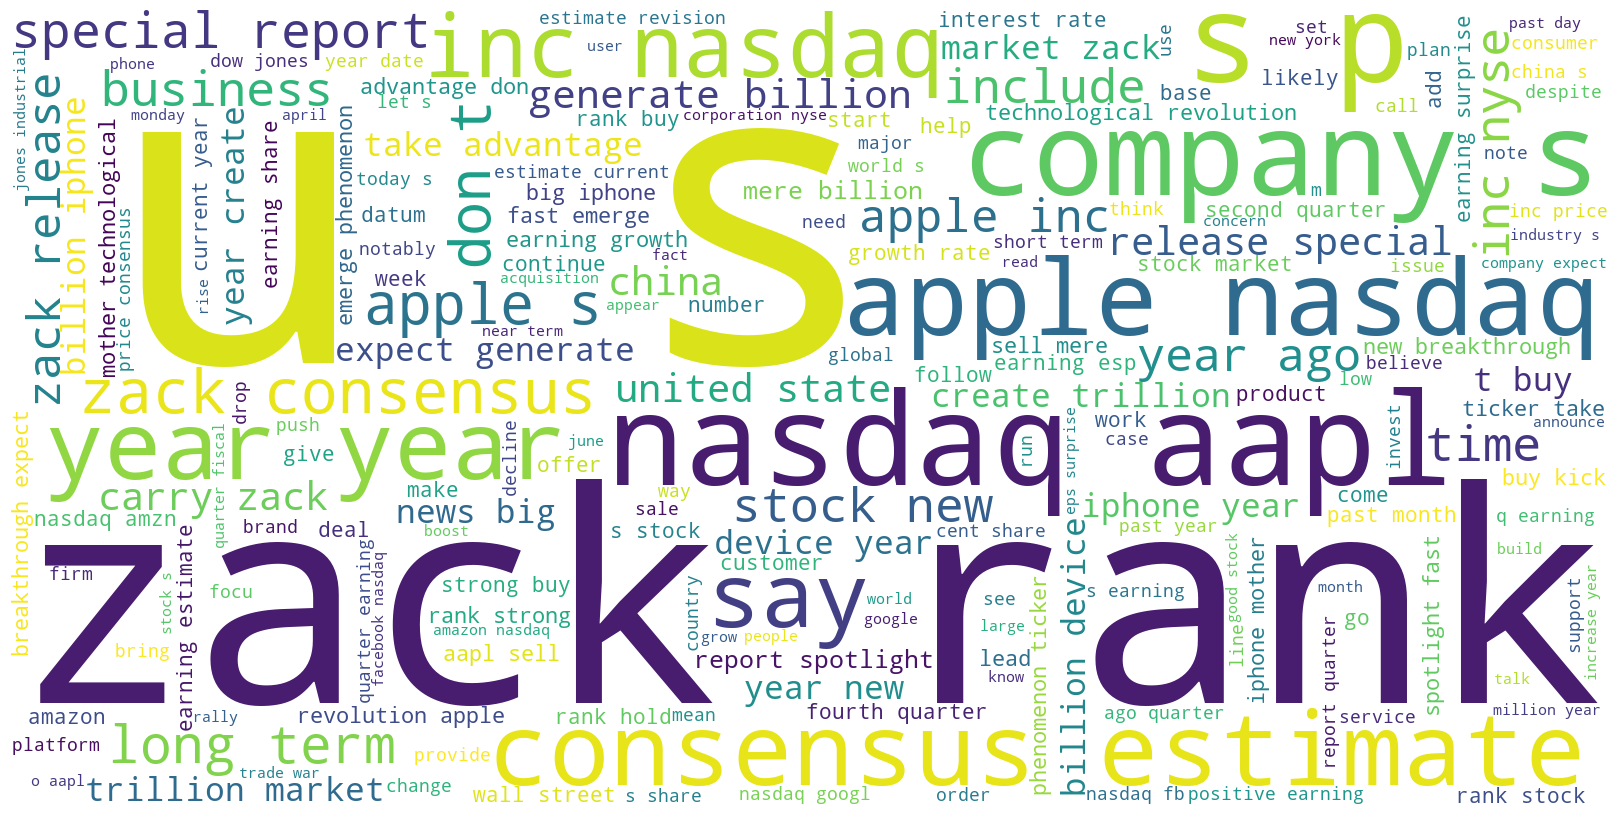

In [45]:
#Initialize word cloud
moby_dick_str = " ".join(ALL_tokens_positive)
wordcloud = WordCloud(width = 1600, height = 800,
background_color ='white',
min_font_size =
10).generate(moby_dick_str)

#Create the Word cloud
plt.figure(figsize = (16, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

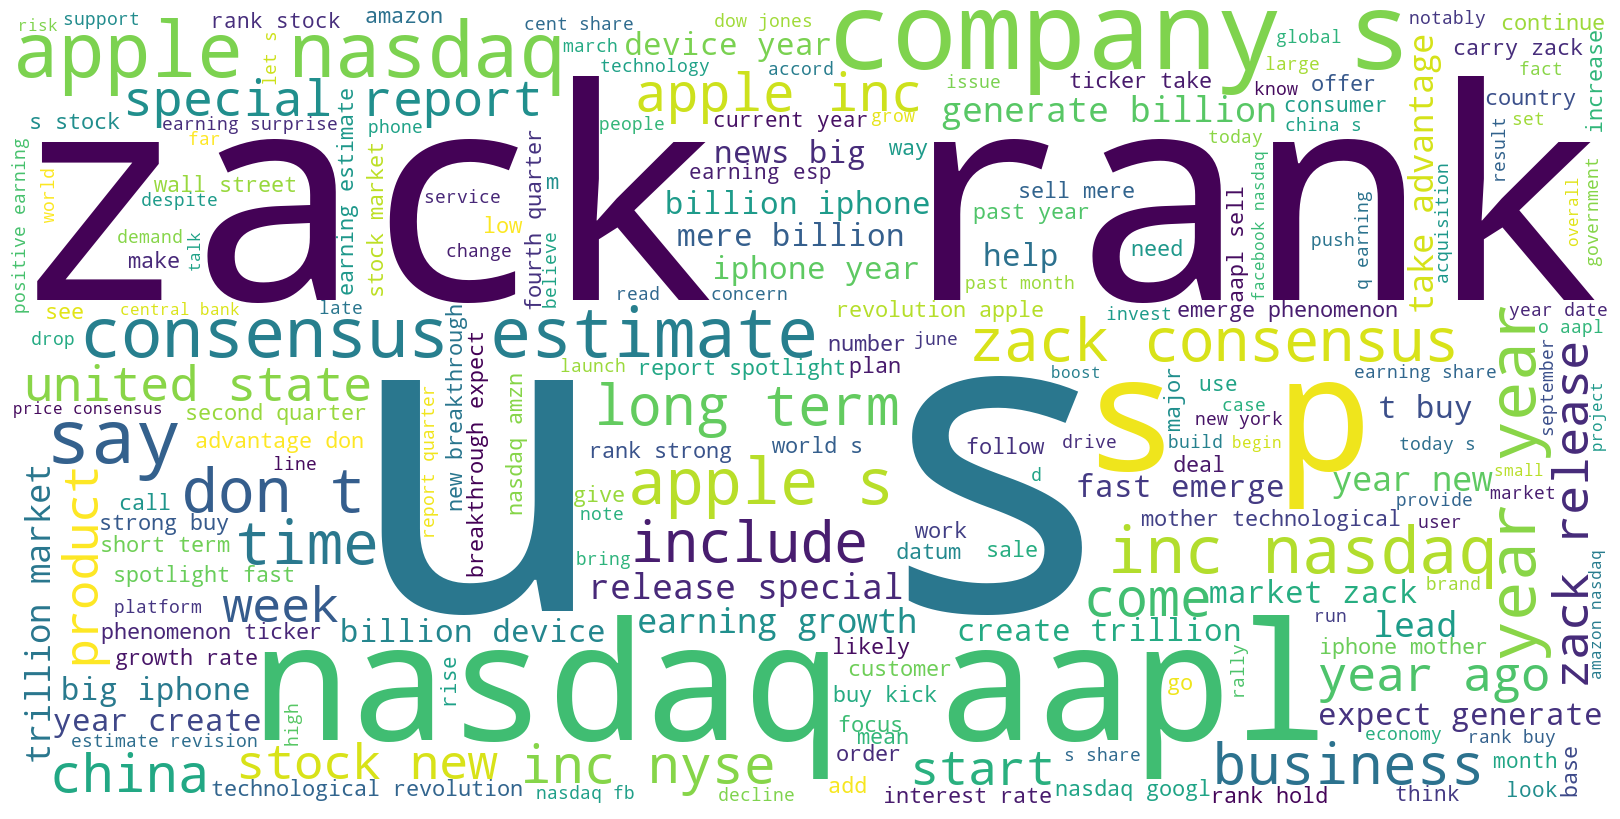

In [46]:
#Initialize word cloud
moby_dick_str = " ".join(ALL_tokens_neg)
wordcloud = WordCloud(width = 1600, height = 800,
background_color ='white',
min_font_size =
10).generate(moby_dick_str)

#Create the Word cloud
plt.figure(figsize = (16, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [18]:
from nltk.util import ngrams

In [19]:
def extract_ngrams(data, num):
    n_grams = ngrams(data, num)
    return [ ' '.join(grams) for grams in n_grams]

In [32]:
x = extract_ngrams(ALL_tokens_positive,2)
Ngrams_pos_counted = Counter(x)

In [33]:
x = extract_ngrams(ALL_tokens_neg,2)
Ngrams_neg_counted = Counter(x)


In [52]:
Intersect = Ngrams_pos_counted - Ngrams_neg_counted

for item, count in Intersect.items():

    Intersect[item] /= Ngrams_pos_counted[item] + Ngrams_neg_counted[item]

intersect_above_80 = Counter({x: count for x, count in Intersect.items() if count >= 0.8})

Pos_candidates = []
for item, count in intersect_above_80.items():
    if Ngrams_pos_counted[item] > 10:
        Pos_candidates.append((item, Ngrams_pos_counted[item]))


In [46]:
intersect_above_80.most_common(10)


[('wait direction', 1.0),
 ('difficult trader', 1.0),
 ('alike directionless', 1.0),
 ('directionless choppiness', 1.0),
 ('choppiness combine', 1.0),
 ('climate maximum', 1.0),
 ('maximum frustration', 1.0),
 ('frustration professional', 1.0),
 ('professional talk', 1.0),
 ('talk unfortunately', 1.0)]

In [39]:
import math
from textblob import TextBlob as tb
def tf(word, blob):
    return blob.words.count(word) / len(blob.words)
def n_containing(word, bloblist):
    return counted_pos[word]+counted_neg[word]
def idf(word, bloblist):
    return math.log(len(bloblist) / (1 + n_containing(word, bloblist)))
def tfidf(word, blob, bloblist):
    return tf(word, blob) * idf(word, bloblist)

In [40]:
df_apple_increase = df_apple[df_apple['target']==1]
df_apple_decrease = df_apple[df_apple['target']==0]

In [41]:
all_text = []
for text in df_apple_increase['text']:
    all_text.append(text)

Pos_docu = ' '.join(all_text)
    
all_text = []
for text in df_apple_decrease['text']:
    all_text.append(text)

Neg_docu = ' '.join(all_text)

In [42]:
from tqdm import tqdm

In [44]:
bloblist = [tb(Pos_docu),tb(Neg_docu)]
results = []
for i, blob in enumerate(bloblist):
    print("Top words in document {}".format(i + 1))
    scores = {word: tfidf(word, blob, bloblist) for word in tqdm(blob.words)}
    results.append(scores)
    



Top words in document 1


  0%|                                                                                                                                                                                        | 532/3271843 [02:15<226:02:17,  4.02it/s]

KeyboardInterrupt: 

In [ ]:
sorted_words = sorted(scores.items(), key=lambda x: x[1], reverse=True)
results.append(sorted_words)
for word, score in sorted_words[:50]:
    print("\tWord: {}, TF-IDF: {}".format(word, round(score, 5)))